In [ ]:
import pathlib
import os
import time
import libximc.highlevel as ximc
import matplotlib.pyplot as plt

#https://files.xisupport.com/other_files/JupyterNotebook/Standa_8SMC5_USB_Python_tutorial.html
#https://doc.xisupport.com/en/8smc4-usb/8SMC4-USB.pdf
#https://files.xisupport.com/8SMC4-USB_Programming_manual_Eng.pdf

In [3]:
virtual_device_filename = "virtual_motor_controller_1.bin"
virtual_device_file_path = os.path.join(pathlib.Path().cwd(), virtual_device_filename)

In [ ]:
# Devices search
devices = ximc.enumerate_devices(ximc.EnumerateFlags.ENUMERATE_NETWORK | ximc.EnumerateFlags.ENUMERATE_PROBE)

if len(devices) == 0:
    print("The real devices were not found. A virtual device will be used.")
else:
    # Print real devices list
    print("Found {} real device(s):".format(len(devices)))
    for device in devices:
        print("  {}".format(device))

The real devices were not found. A virtual device will be used.


In [5]:
device_uri = "xi-emu:///{}".format(virtual_device_file_path)
# device_uri = r"xi-com:\\.\COM29"
# device_uri = "xi-tcp://172.16.131.140:1820"
# device_uri = "xi-net://192.168.1.120/abcd"

In [10]:
axis = ximc.Axis(device_uri)
# To open the connection, you must manually call `open_device()` method
axis.open_device()

In [7]:
# get_position method returns position_t object
position = axis.get_position()
print("Initial position:", position.Position)

print("Start moving")
axis.command_right()
for i in range(3):
    time.sleep(1)
    print("Moving...")

print("Stop moving")
axis.command_stop()

position = axis.get_position()
print("Final position:", position.Position)

Initial position: 0
Start moving
Moving...
Moving...
Moving...
Stop moving
Final position: 3002


Current position: 0
Move to position: 4000
Moving...
Current position: 4000
Move to position: 0
Moving...
Movement finished
Current position: 0


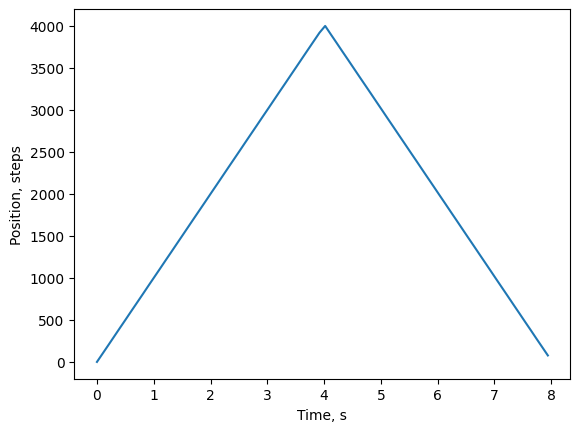

In [15]:
axis.open_device()

# Arrays for logging positions and timestamps during motion
positions = []
timestamps_s = []

axis.command_zero()

position = axis.get_position()
print("Current position:", position.Position)

# ==== Shift the stage ====
next_position = 4000
print("Move to position:", next_position)
axis.command_move(next_position, 0)

print("Moving...")

t_start_s = time.time()

# Check axis motion status in a loop
status = axis.get_status()
while status.MvCmdSts & ximc.MvcmdStatus.MVCMD_RUNNING:
    position = axis.get_position()

    # Do some job during the motion
    positions.append(position.Position)
    timestamps_s.append(time.time() - t_start_s)

    time.sleep(0.1)

    # Update status for the next check of the loop condition
    status = axis.get_status()

position = axis.get_position()
print("Current position:", position.Position)


# ==== Shift the stage back ====
next_position = 0
print("Move to position:", next_position)
axis.command_move(next_position, 0)

print("Moving...")

# Check axis motion status in a loop
status = axis.get_status()
while status.MvCmdSts & ximc.MvcmdStatus.MVCMD_RUNNING:
    position = axis.get_position()

    # Do some job during the motion
    positions.append(position.Position)
    timestamps_s.append(time.time() - t_start_s)

    time.sleep(0.1)

    # Update status for the next check of the loop condition
    status = axis.get_status()

print("Movement finished")

position = axis.get_position()
print("Current position:", position.Position)

axis.close_device()

# ==== Plot motion profile ====
plt.plot(timestamps_s, positions)
plt.xlabel("Time, s")
plt.ylabel("Position, steps")
plt.show()

In [9]:
axis.close_device()
print("Device disconnected")

Device disconnected
